## Implementation of ANN in Keras 
#### Regression Problem

Using California Housing dataset from Scikit-Learn

In this project we would try to predict the housing price in a particular block group in the state of California given several features of the houses and the households in the housing blocks. 

In [44]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [45]:
housing = fetch_california_housing()

In [46]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [47]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [48]:
## Explanatory Variables

x = pd.DataFrame(housing.data, columns = housing.feature_names)

In [49]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [50]:
## Target Variable

y = pd.DataFrame(housing.target, columns = ['target'])

In [51]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [52]:
x.drop(['Latitude',	'Longitude'], inplace = True, axis=1)

In [53]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


Splitting the data into train, test, and validation sets

In [54]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x,y, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42)

In [55]:
print(x_train_full.shape)
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(15480, 6)
(11610, 6)
(3870, 6)
(5160, 6)


So, 11610 observations will be used for training the neural nework, 3870 observations will be used for validating out neural network, and 5160 observations will be used as the testing the neural network. 

In [56]:
## Scaling down our train, test, and validation data

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

Model Building

We would create 3 hidden layers inside our neural network. The first layer would have 30 neurons, the second layer would have 10 neurons, the third layer would have 5 neurons, and the last layer will be the output layer. Since this is a regression problem, there would only be one neuron for the output layer. 

In [57]:
Layers = [tf.keras.layers.Dense(30, activation='relu', input_shape= x_train.shape[1:]),
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(5, activation='relu'),
          tf.keras.layers.Dense(1)]

In [58]:
model = tf.keras.models.Sequential(Layers)

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                210       
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 581 (2.27 KB)
Trainable params: 581 (2.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


CallBack Functions

In [111]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience = 5, min_delta =0.0001, restore_best_weights=True)

In [112]:
checkpoint_path = 'Model_Checkpoint.h5'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only = True)

Model Training

In [113]:
model.compile(optimizer='sgd', loss = 'mse')

In [119]:
history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_valid, y_valid), callbacks=[early_stopping_callback, checkpoint_callback])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4057 - val_loss: 0.3978
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4040 - val_loss: 0.3991
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4048 - val_loss: 0.3997
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4028 - val_loss: 0.4025
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4046 - val_loss: 0.3942
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4038 - val_loss: 0.3952
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4038 - val_loss: 0.3918
Epoch 8/20
105/363 [=======>......................] - ETA: 0s - loss: 0.3780

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 2ms/step - loss: 0.4035 - val_loss: 0.3902
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4028 - val_loss: 0.3917
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4021 - val_loss: 0.3864
Epoch 11/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4019 - val_loss: 0.3948
Epoch 12/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4026 - val_loss: 0.3966
Epoch 13/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4022 - val_loss: 0.4000
Epoch 14/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3999 - val_loss: 0.3970
Epoch 15/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3998 - val_loss: 0.3925


So we have saved our best model using the callback functions. Now we would trian our nural network using this best model. 

In [123]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.405728,0.397777
1,0.403953,0.399088
2,0.404807,0.399699
3,0.402770,0.402491
4,0.404577,0.394241
5,0.403815,0.395169
6,0.403844,0.391802
7,0.403473,0.390222
8,0.402820,0.391668
9,0.402090,0.386368


<AxesSubplot: >

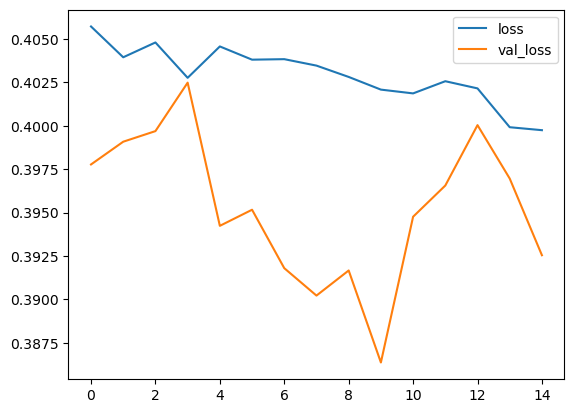

In [124]:
pd.DataFrame(history.history).plot()

Loading Checkpoint model

In [125]:
checkpoint_model = tf.keras.models.load_model(checkpoint_path)

Prediction for the unknown test data

In [126]:
checkpoint_model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4057


0.4056857228279114

The loss is quite low for the test data.

Sample Check - Checking for the fist test data

In [127]:
unknown = x_test[0]

In [128]:
unknown

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735])

In [139]:
actual = y_test.values[0]

In [140]:
actual

array([0.477])

So for the first test data, given the 'unknown' array as the feature values, the actual or the observed target value is 0.477. So we would expect our model to predit somewhere near this value. 

In [141]:
unknown.shape

(6,)

In [142]:
model.predict(unknown.reshape((1,6)))

1/1 [==============================] - 0s 28ms/step


array([[0.8794749]], dtype=float32)

So for the same 'unknown' array, out model predicted the target as 0.8794749.